In [192]:
# K-Nearest Neighbor
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('../data/iris.csv')

In [78]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [81]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df.Name)

In [82]:
y[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [83]:
X = np.array(df.iloc[:, 0:4])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=10)

In [87]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [88]:
pred = knn.predict(X_test)

In [89]:
pred[:100]

array([0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2,
       1, 1, 0, 1, 0, 0])

In [90]:
knn.score(X_test, y_test)

1.0

In [91]:
from sklearn import metrics

In [92]:
metrics.confusion_matrix(y_true=y_test, y_pred=pred)

array([[22,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 16]])

In [93]:
print(metrics.classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Support Vector Machine

In [94]:
data = pd.read_csv('../data/iris.csv')

In [95]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [174]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


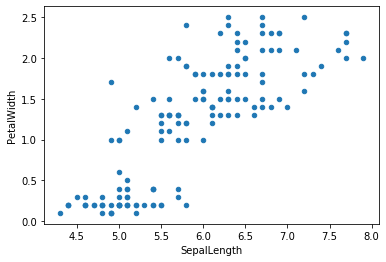

In [176]:
import matplotlib.pyplot as plt
data.plot(kind="scatter",  x='SepalLength', y='PetalWidth')

In [237]:
#X = pd.DataFrame(data.iloc[:, :4])
X = data.iloc[:, [2, 3]]

In [238]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [239]:
label_encoder = preprocessing.LabelEncoder()

In [240]:
from sklearn import svm
C = 1.0

In [241]:
svm_model = svm.SVC(kernel='rbf', C=C)

In [242]:
svc  = svm_model.fit(X, y)

/Users/t_ishikawa/workspace/python_work/my-python-scripts-and-notebooks/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [243]:
x_min, x_max = X.iloc[:, 0].min() -1,  X.iloc[:, 0].max() + 1

In [244]:
y_min, y_max =X.iloc[:, 1].min() -1,  X.iloc[:, 1].max() + 1

In [245]:
h = 0.02#(x_max/x_min) / 100

In [252]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [253]:
Z[:100]

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

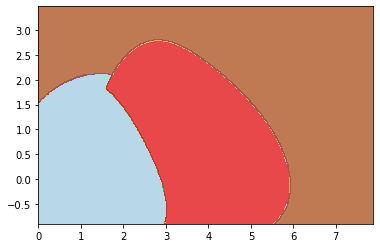

In [254]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

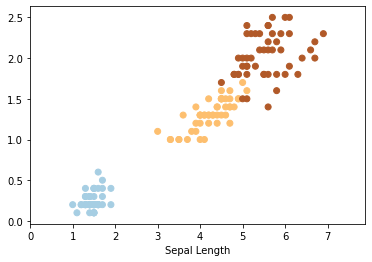

In [255]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('')
plt.xlim(xx.min(), xx.max())
plt.show()

